In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Recap: How did I get this information? 

I used the EDDIE NC website to obtain charter schools that are active for the 2021-2022 school year to find the school names. 
* Utilize google api search for {schoolname}+meet+the+board+members to find the website
* Use openAI gpt3 to find the names of the board members
* Tedious data cleaning 

Then I used the NC Board of Elections website to obtain the voter registration information for each board member.
* use lexical similiarity comparison to find the closest match for each board member
* filter by zip code proximity and name similiarity to find the correct board member
* Tedious data cleaning

The 'board_ed' is a collection of districts that have charter schools
* same procedure applied: use google api to search for district board of education
* use openAI gpt3 to find the names of the board members
* Tedious data cleaning

### What is the purpose of this notebook?

Minor data analysis on the number of Rep, Dem, and Unaffiliated voters in each district by district board members or charter school members

In [7]:
board_ed = pd.read_csv('board_ed.csv')
merge_charter_district = pd.read_csv('merge_charter_district.csv')

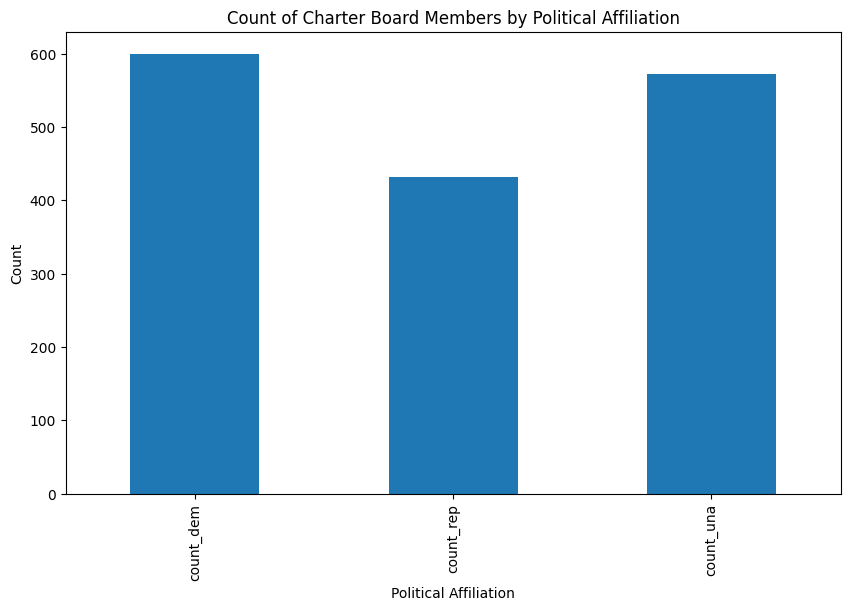

In [10]:
plt.figure(figsize=(10, 6))
affiliation_columns = ['count_dem', 'count_rep', 'count_una']
merge_charter_district[affiliation_columns].sum().plot(kind='bar')
plt.title('Count of Charter Board Members by Political Affiliation')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.show()

In [14]:
merge_charter_district[affiliation_columns].sum()

count_dem    600
count_rep    432
count_una    573
dtype: int64

This is a count of all the charter school board members in the dataset. Majority of the boards are democrats, but the difference between republican is just 168

<Figure size 1000x600 with 0 Axes>

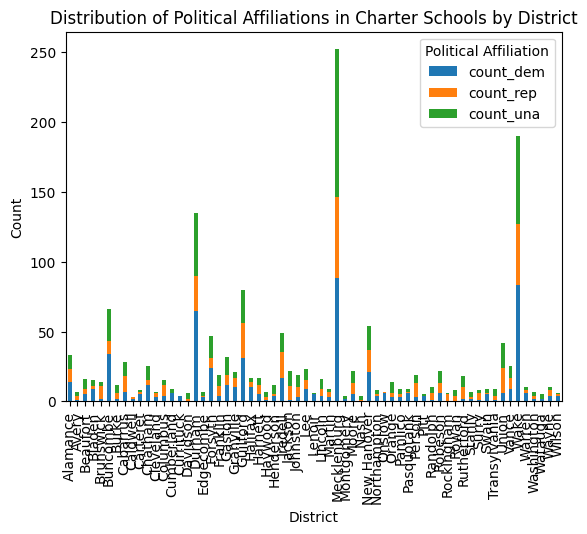

In [17]:
plt.figure(figsize=(10, 6))
merge_charter_district.groupby('countydescription')[['count_dem', 'count_rep', 'count_una']].sum().plot(kind='bar', stacked=True)
plt.title('Distribution of Political Affiliations in Charter Schools by District')
plt.xlabel('District')
plt.ylabel('Count')
plt.legend(title='Political Affiliation')
plt.show()

This is a stacked bar chart grouped by the district. Its not suprising to see that majority of the board members are concentrated around the major cities in the state. Such as Durham, Mecklenburg, and Wake. The chart may be skewed because of the size of the districts.

<Figure size 1000x600 with 0 Axes>

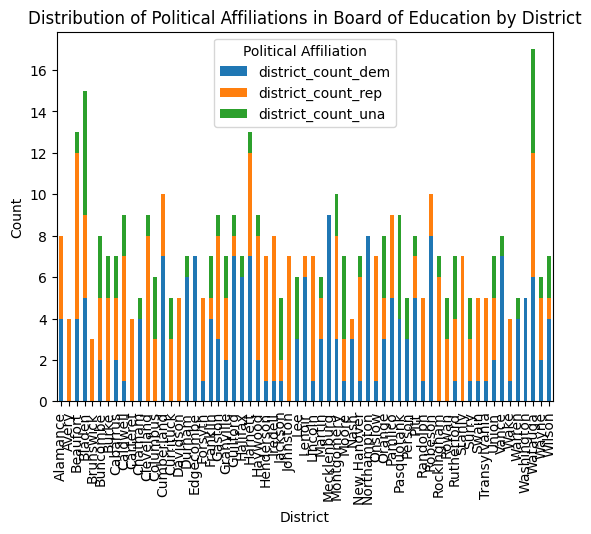

In [18]:
plt.figure(figsize=(10, 6))
board_ed.groupby('countydescription')[['district_count_dem', 'district_count_rep', 'district_count_una']].sum().plot(kind='bar', stacked=True)
plt.title('Distribution of Political Affiliations in Board of Education by District')
plt.xlabel('District')
plt.ylabel('Count')
plt.legend(title='Political Affiliation')
plt.show()

In [19]:
board_ed.groupby('countydescription')[['district_count_dem', 'district_count_rep', 'district_count_una']].sum().describe()

,district_count_dem,district_count_rep,district_count_una
count,63.000000,63.000000,63.000000
mean,2.857143,3.158730,1.238095
std,2.532735,2.308514,1.410951
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,2.000000,3.000000,1.000000
75%,4.500000,5.000000,2.000000
max,9.000000,8.000000,6.000000


Stacked bar chart again of each district, but this time its by the board of education. The distribution of amount of board members is pretty even across the chart. Makes sense since we are looking at a static number of board members per district. Incomparison to sparse distribution of charter schools per districts. 

In [21]:
merge_charter_district[['count_dem', 'count_rep', 'count_una','district_count_dem', 'district_count_rep', 'district_count_una']]

,count_dem,count_rep,count_una,district_count_dem,district_count_rep,district_count_una
0,5,2,0,6,0,1
1,2,2,2,6,0,1
2,6,1,2,6,0,1
3,2,4,4,6,0,1
4,5,0,1,6,0,1
...,...,...,...,...,...,...
201,2,0,3,6,6,5
202,3,3,1,2,3,1
203,1,1,1,2,3,1
204,0,1,0,4,1,2


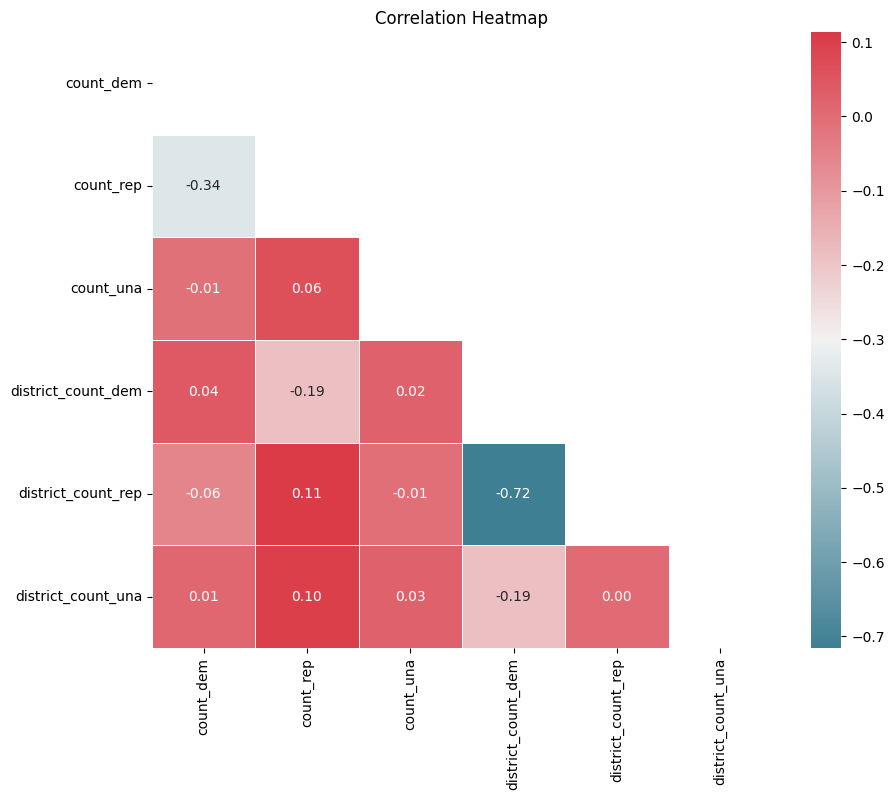

In [24]:

corr_matrix = merge_charter_district[['count_dem', 'count_rep', 'count_una','district_count_dem', 'district_count_rep', 'district_count_una']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
# Set the plot title
plt.title("Correlation Heatmap")
# Display the heatmap
plt.show()

Throwing a random heat map correlation on top. 

* -.72 for district board of education on republican/ democrat board members - Does this show a heavy polarization on either side where if its one side R or D, the other has less seats? 

* .11 Charter schools with more republican board members have some correlation with districts with more republican district board members.

* .10 Do we have closet democrats in republican districts as UNA or we have data that might be unclean?


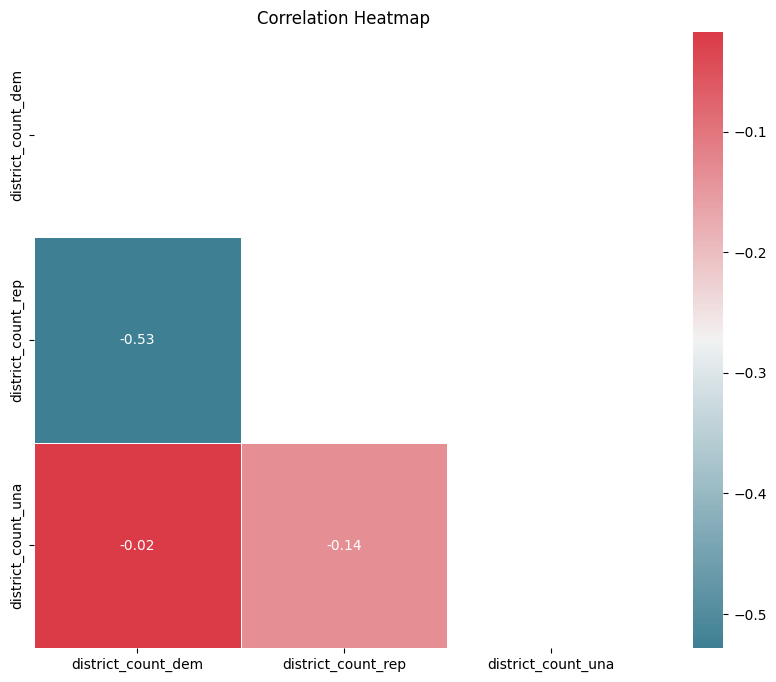

In [25]:

corr_matrix = board_ed[['district_count_dem', 'district_count_rep', 'district_count_una']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
# Set the plot title
plt.title("Correlation Heatmap")
# Display the heatmap
plt.show()

Doing a second heat map on district board of education dataset. This is more of a sanity check to see the negative correlation is existing between negative and democrat district board members